In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rod
import positionVerlet2nd as verlet
#from povray_scripts import dump_snake

# Initialize rod

In [3]:
nelem = 50
L = 3.
externalForce = 15.
x = np.linspace(0.,L,nelem+1)
ri = np.array([[i,0.,0.] for i in x])
f = np.array([[0.,0.,0.] for i in range(nelem+1)])
f[-1,1] = -externalForce
rad = np.ones(nelem) * 0.25

# a = rod(n=nelem, r=ri, rho=1., yng_mod=1., shr_mod=2., radii=rad, f_ext=f ,gamma=0.05)
theRod = rod.rod(n=nelem, r=ri, rho=5.0e3, yng_mod=1.0e6, shr_mod=1.0e4, f_ext=f, radii=rad, gamma=0.1)

## Set boundary conditions

In [4]:
def dirichletBC(my_rod, my_time):
    my_rod.v[0] = 0.0 * my_rod.v[0]
    my_rod.w[0] = 0.0 * my_rod.w[0]

## Initialize time stepper

In [5]:
rodRun = verlet.positionVerlet2nd(theRod, dirichletBC)

<IPython.core.display.Javascript object>


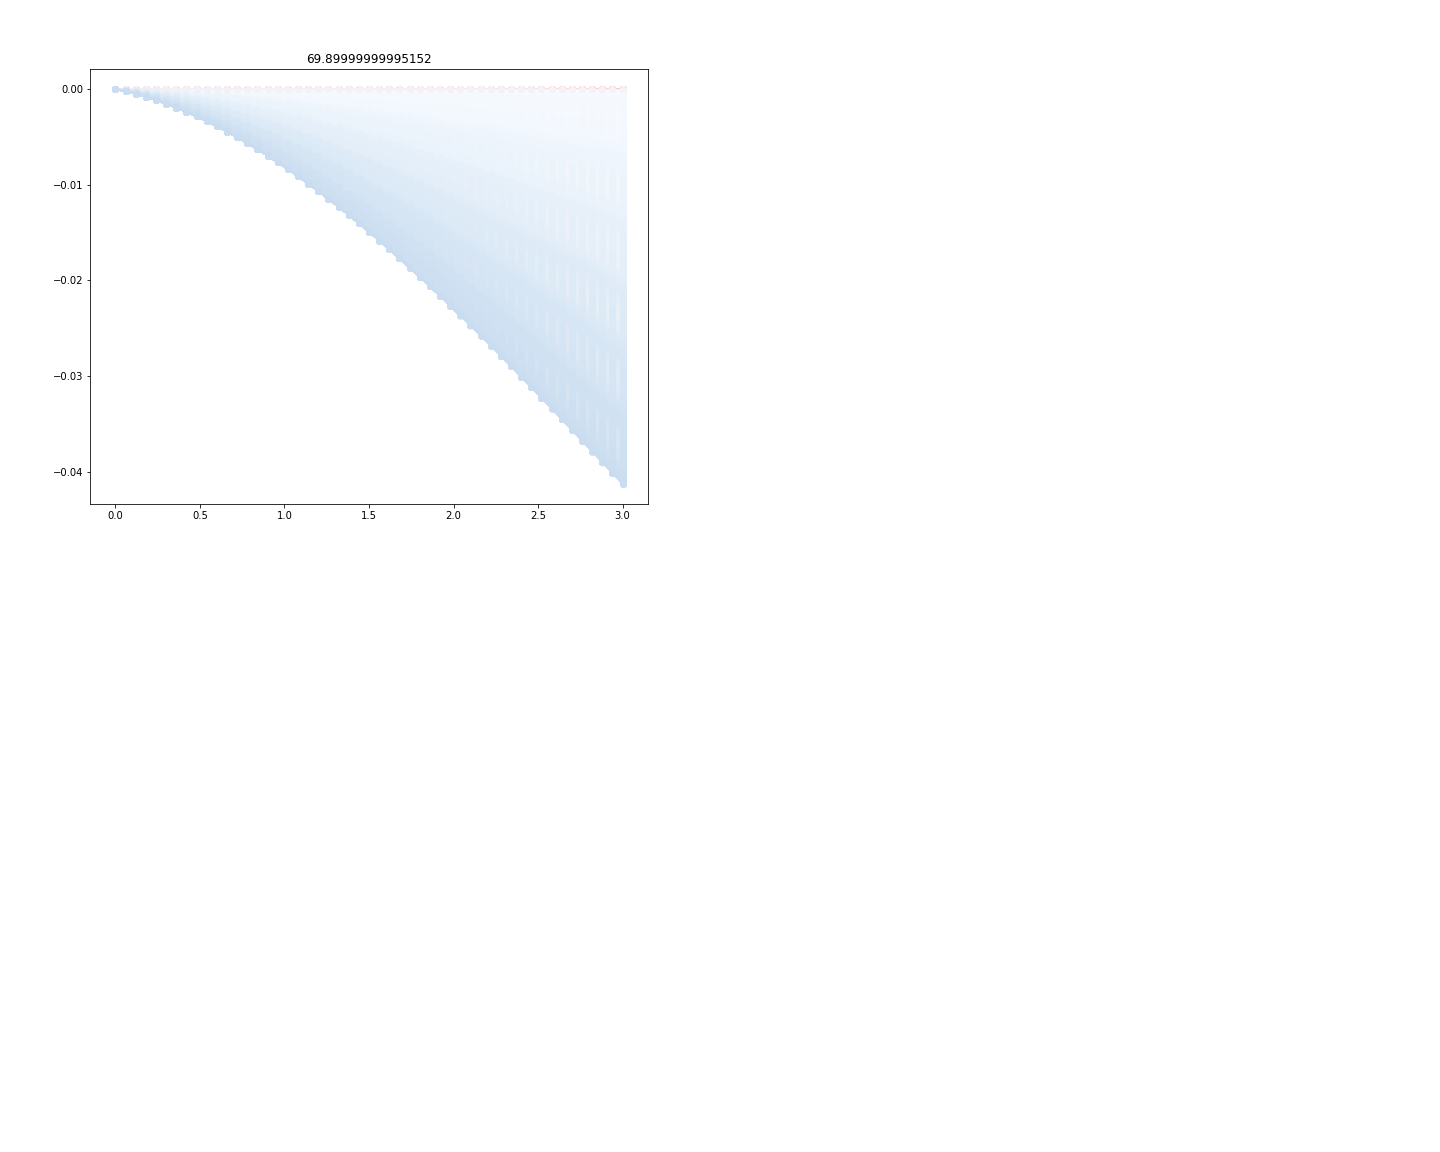

KeyboardInterrupt: 

In [6]:
from matplotlib import cm
%matplotlib inline
plot = True
dump_povray = False

my_dt = 1.0e-2 * L / nelem
t = 0.0
t_end = 300.
tstep  = 0
tot_it = t_end / my_dt

prefix = "./data/timoshenko/"

if plot:
    %matplotlib notebook
    plt.ion()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.plot(theRod.r[:,0], theRod.r[:,1], 'ro-')

while t < t_end:
    
    theRod.f_ext[-1,1] = -min(t/100.*externalForce, externalForce)
    rodRun.step(my_dt)
    t = t + my_dt
    tstep += 1
    
    if tstep % 50 == 0:
        if dump_povray:
            dump_snake.dump_snake_to_povray(tstep, theRod.r, np.average(theRod.radii), prefix)
        if plot:
            ax.plot(theRod.r[:,0], theRod.r[:,1], 'o-', alpha=0.1+0.3*tstep/tot_it, c=cm.Blues(tstep/tot_it))
            ax.set_title(t)
            fig.canvas.draw()
            fig.canvas.flush_events()

%matplotlib inline

In [ ]:
ax.plot(theRod.r[:,0], theRod.r[:,1], 'g-', label='Simulation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Timeshenko Beam')

# Analytical solution for Timoshenko beam

In [ ]:
s = np.linspace(0.,L,nelem+1)
F = externalForce
A = theRod.A_org[0]
I1 = theRod.I_org[0,0]
E = theRod.yng_mod
G = theRod.shr_mod
y = - F / (4./3. * A * G)*s - F * L / (2. * 1e6 * I1)*s**2 + F / (6. * E * I1) * s**3

In [ ]:
ax.plot(s, y, 'r--', label='Analytical')
ax.legend()
fig

In [ ]:
%matplotlib inline
import seaborn as sns
color = sns.color_palette("coolwarm", 7)
fig2 = plt.figure(figsize=(10, 8))
bx = fig2.add_subplot(111)
bx.plot(theRod.r[:,0], theRod.r[:,1], '-', linewidth=1.5, c=color[0], label='Simulation')
bx.plot(s, y, '--', linewidth=2., c=color[-1], label='Analytical')
bx.legend()
bx.set_xlim([0.,3.])
bx.set_title('Timoshenko beam: {} elements'.format(nelem))
bx.set_xlabel('x')
bx.set_ylabel('y')

In [ ]:
fig2.savefig('timoshenko.png', dpi=1200)

In [ ]:
fig.savefig('timoshenko_timeline.png', dpi=1200)

In [ ]:
fig.savefig('timoshenko_timeline.eps', dpi=1200)